In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
data = iris.data 
feature_names = iris.feature_names

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [7]:
iris_features = pd.DataFrame(data_scaled, columns=feature_names)
iris_features['Cluster'] = kmeans.labels_

In [8]:
cluster_summary = iris_features.groupby('Cluster').mean()
cluster_std = iris_features.groupby('Cluster').std() 
cluster_count = iris_features.groupby('Cluster').count()

In [9]:
print("Cluster Mean Values:")
print(cluster_summary)

print("\nCluster Standard Deviation Values:")
print(cluster_std)

print("\nCluster Sample Count:")
print(cluster_count)

Cluster Mean Values:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 0.571004         -0.371768           0.691119   
1                -0.816231          1.318958          -1.286834   
2                -1.327654         -0.373138          -1.137236   

         petal width (cm)  
Cluster                    
0                0.663152  
1               -1.219712  
2               -1.114862  

Cluster Standard Deviation Values:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 0.754541          0.726348           0.437413   
1                 0.349980          0.623778           0.103387   
2                 0.290851          0.831505           0.437158   

         petal width (cm)  
Cluster                    
0                0.541709  
1                0.151780  
2                0.

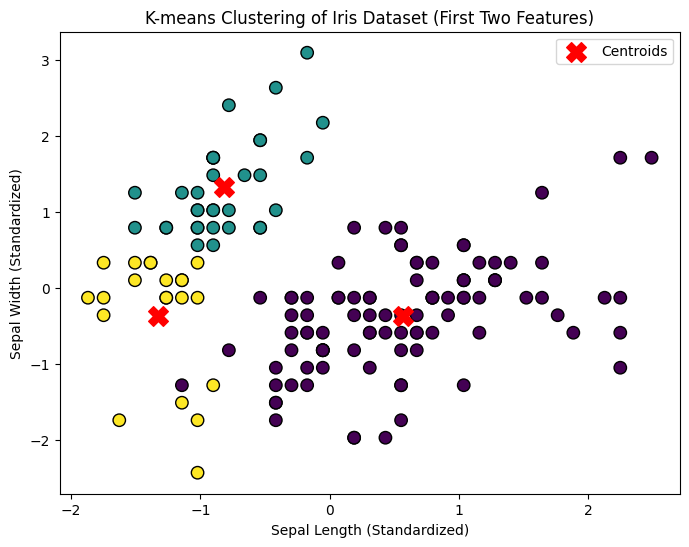

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(iris_features.iloc[:, 0], iris_features.iloc[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Iris Dataset (First Two Features)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend()
plt.show()

In [11]:
report = """
Cluster Analysis Report:

Based on K-means clustering with 3 clusters, we analyzed the Iris dataset. Here are the key observations:

1. **Cluster 0 (Setosa-like) Characteristics**:
   - Sepal length: {:.2f}, Sepal width: {:.2f}, Petal length: {:.2f}, Petal width: {:.2f}
   - This cluster represents small flowers with relatively small petals and wide sepals.

2. **Cluster 1 (Versicolor-like) Characteristics**:
   - Sepal length: {:.2f}, Sepal width: {:.2f}, Petal length: {:.2f}, Petal width: {:.2f}
   - This cluster represents flowers with medium-sized petals and moderate-sized sepals.

3. **Cluster 2 (Virginica-like) Characteristics**:
   - Sepal length: {:.2f}, Sepal width: {:.2f}, Petal length: {:.2f}, Petal width: {:.2f}
   - This cluster represents larger flowers with large petals and moderately sized sepals.

The features that distinguish these clusters most notably are petal length and petal width.

Cluster Summary:
- Cluster 0: Smallest flowers (Setosa-like)
- Cluster 1: Intermediate-sized flowers (Versicolor-like)
- Cluster 2: Largest flowers (Virginica-like)
""".format(
    cluster_summary.iloc[0]['sepal length (cm)'], cluster_summary.iloc[0]['sepal width (cm)'],
    cluster_summary.iloc[0]['petal length (cm)'], cluster_summary.iloc[0]['petal width (cm)'],
    cluster_summary.iloc[1]['sepal length (cm)'], cluster_summary.iloc[1]['sepal width (cm)'],
    cluster_summary.iloc[1]['petal length (cm)'], cluster_summary.iloc[1]['petal width (cm)'],
    cluster_summary.iloc[2]['sepal length (cm)'], cluster_summary.iloc[2]['sepal width (cm)'],
    cluster_summary.iloc[2]['petal length (cm)'], cluster_summary.iloc[2]['petal width (cm)']
)

print(report)

with open("cluster_analysis_report.txt", "w") as file:
    file.write(report)


Cluster Analysis Report:

Based on K-means clustering with 3 clusters, we analyzed the Iris dataset. Here are the key observations:

1. **Cluster 0 (Setosa-like) Characteristics**:
   - Sepal length: 0.57, Sepal width: -0.37, Petal length: 0.69, Petal width: 0.66
   - This cluster represents small flowers with relatively small petals and wide sepals.

2. **Cluster 1 (Versicolor-like) Characteristics**:
   - Sepal length: -0.82, Sepal width: 1.32, Petal length: -1.29, Petal width: -1.22
   - This cluster represents flowers with medium-sized petals and moderate-sized sepals.

3. **Cluster 2 (Virginica-like) Characteristics**:
   - Sepal length: -1.33, Sepal width: -0.37, Petal length: -1.14, Petal width: -1.11
   - This cluster represents larger flowers with large petals and moderately sized sepals.

The features that distinguish these clusters most notably are petal length and petal width.

Cluster Summary:
- Cluster 0: Smallest flowers (Setosa-like)
- Cluster 1: Intermediate-sized flo